In [1]:
#mount my google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


### 1. Import necessary libraries (pandas,numpy,matplotlib.pyplot).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Load the data in google colab (housing.csv dataset)

In [8]:
df_housing = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/housing.csv')

### 3.Check for the null values. If there are null values, how will you compute them?

To check for null values in a dataset, you can use functions like .isnull() or .isna() in Python libraries such as Pandas.
If null values exist, you have several options:

Drop them: If null values are few and won't significantly impact analysis, dropping them ensures cleaner data.

Impute them: Replace null values with a statistic like mean, median, or mode based on the data distribution to preserve data integrity.

Model-based imputation: Use advanced techniques like regression or machine learning models to predict missing values based on other variables.

In [10]:
null_values_housing=df_housing.isnull()
print(null_values_housing)
print(null_values_housing.sum())

        RM  LSTAT  PTRATIO   MEDV
0    False  False    False  False
1    False  False    False  False
2    False  False    False  False
3    False  False    False  False
4    False  False    False  False
..     ...    ...      ...    ...
484  False  False    False  False
485  False  False    False  False
486  False  False    False  False
487  False  False    False  False
488  False  False    False  False

[489 rows x 4 columns]
RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


###no null values are there.

### 4. Detect the outliers using box plot and remove them

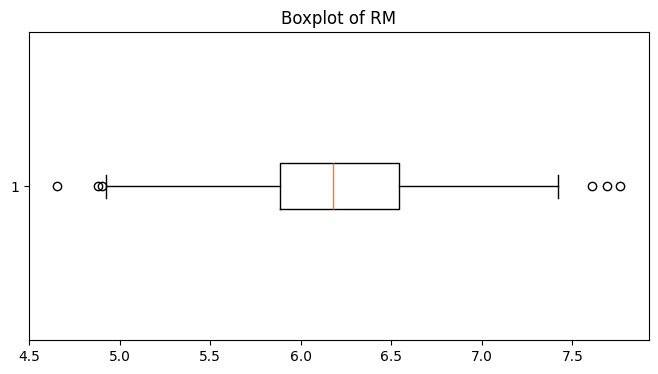

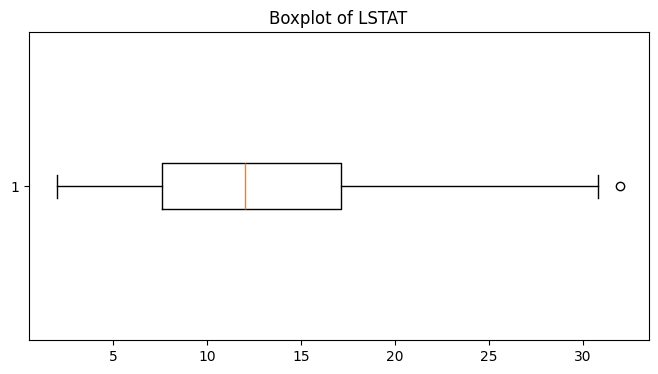

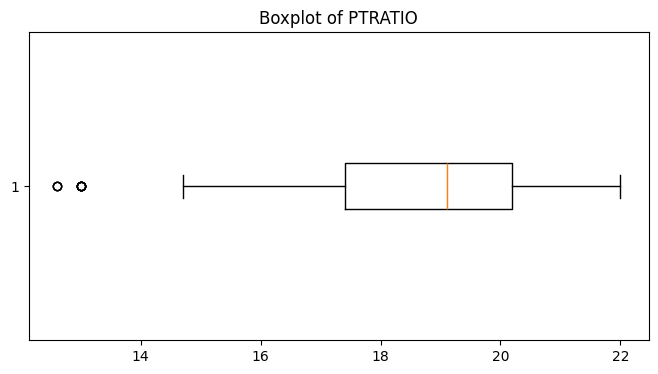

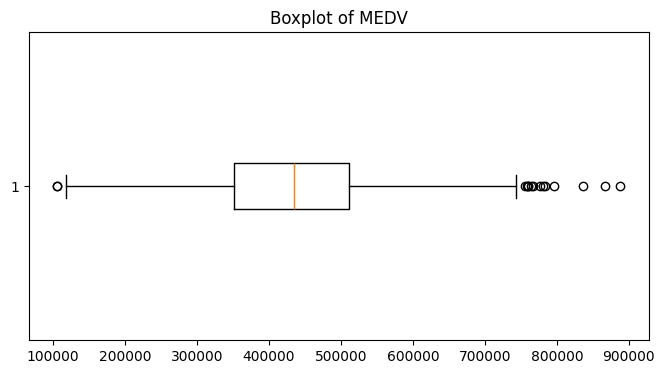

In [39]:
for col in df_housing.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8,4))
    plt.boxplot(df_housing[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [34]:
# Example of calculating outliers and removing them
columns = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
for col in columns:
    mean = df_housing[col].mean()
    std = df_housing[col].std()
    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std
    # Filter rows within the bounds
    outliers = df_housing[(df_housing[col] < lower_limit) | (df_housing[col] > upper_limit)]
    df_housing_cleaned = df_housing[(df_housing[col] >= lower_limit) & (df_housing[col] <= upper_limit)]

In [35]:
print(df_housing_cleaned)

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[463 rows x 4 columns]


Outliers are detected by identifying data points outside the range
[
𝜇
−
3
𝜎
,
𝜇
+
3
𝜎
]
, where
𝜇
μ is the mean and
𝜎
σ is the standard deviation. For each column (RM, LSTAT, PTRATIO, MEDV), rows with values outside this range are removed to clean the dataset and reduce their influence on the analysis.

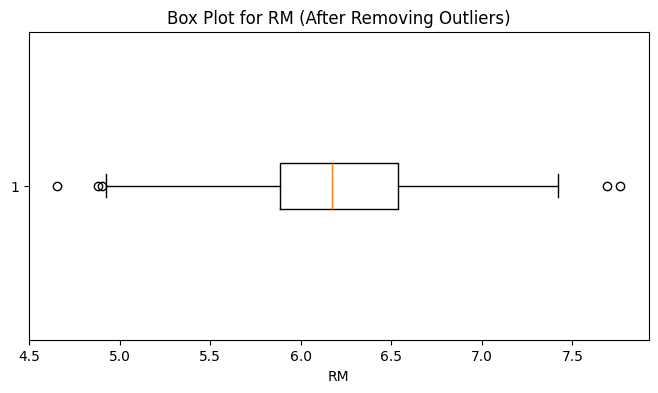

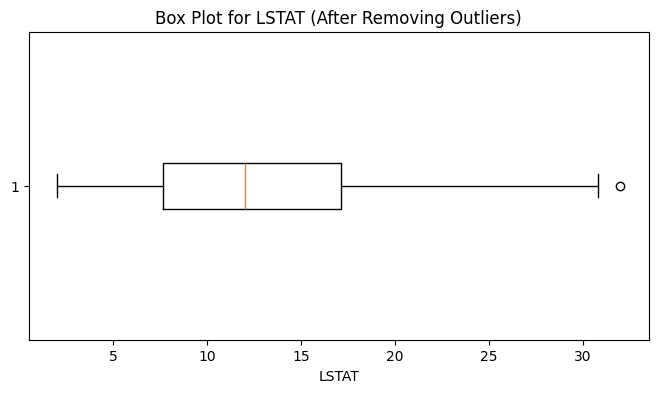

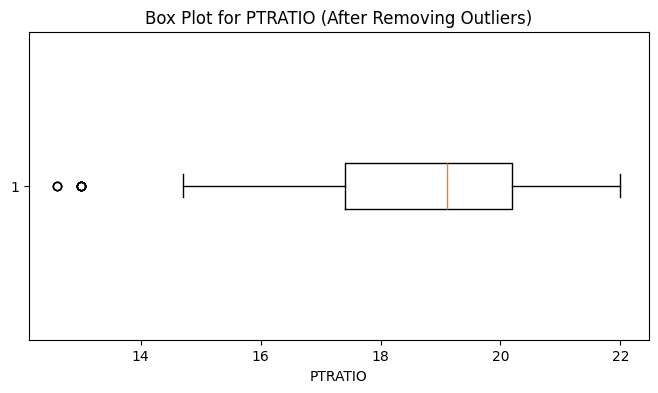

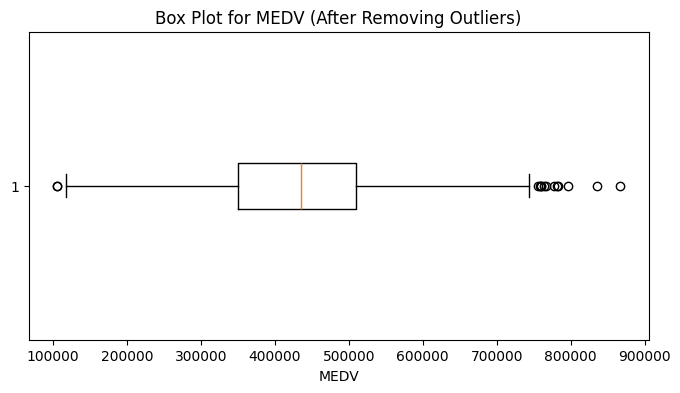

In [41]:
for col in df_housing_cleaned.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_housing_cleaned[col].dropna(), vert=False)
    plt.title(f'Box Plot for {col} (After Removing Outliers)')
    plt.xlabel(col)
    plt.show()

###5. Find the correlation of all other variables with the target MEDV using the scatter plot, and report the highly correlated variable with MEDV.

RM         0.639688
LSTAT     -0.782131
PTRATIO   -0.487010
MEDV       1.000000
Name: MEDV, dtype: float64


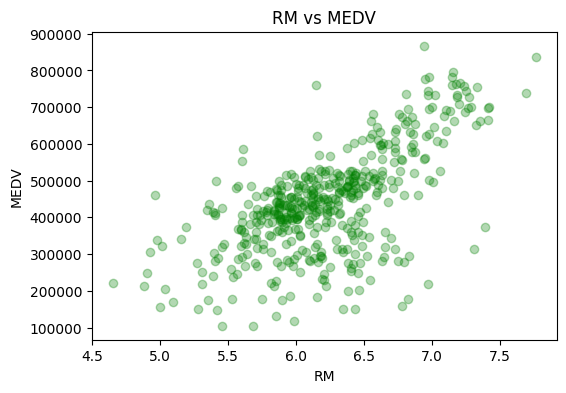

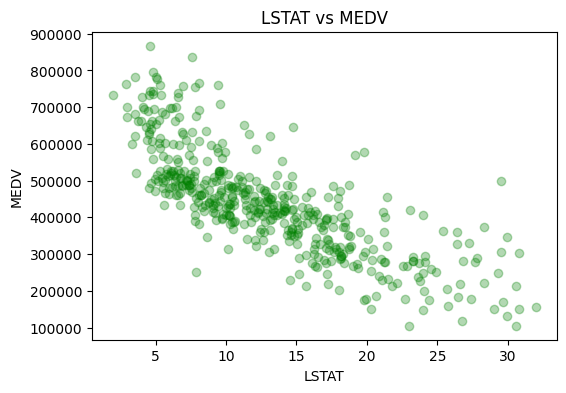

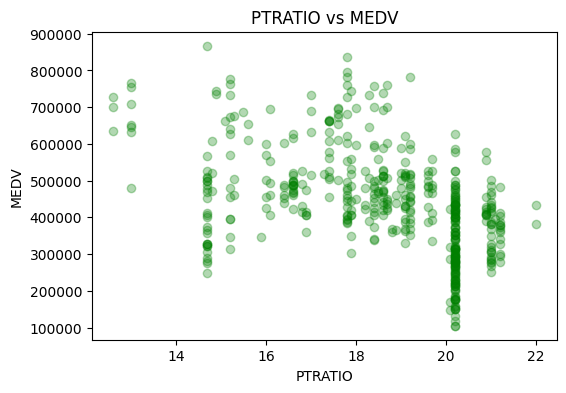

In [47]:
target = 'MEDV'
correlations = df_housing_cleaned.corr()[target]
print(correlations)

# Plot scatter plots for highly correlated variables
for cols in df_housing_cleaned.columns:
    if cols != target:
        plt.figure(figsize=(6, 4))
        plt.scatter(df_housing_cleaned[cols], df_housing_cleaned[target],c='green', alpha=0.3)
        plt.title(f'{cols} vs {target}')
        plt.xlabel(cols)
        plt.ylabel(target)
        plt.show()

The scatter plots reveal the relationship between MEDV and other variables, while the correlation coefficient quantifies it. The variable with the highest correlation (e.g., RM) indicates the strongest linear relationship with MEDV.

#**REGRESSION**

###Consider the attached datasets. You will find only one independent variable (Income in thousand dollars) and one target variable (card balance in hundred dollars). Train the polynomial regression model with M = 1, 2, 5, 7, and 8 without using the library. Note down the training and testing RMSEs and list them in the table. Write your observations. Also, obtain the plots of predictions for the training set and test them in each case.

In [52]:
# Load datasets
train = pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/train.csv")
test = pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/test.csv")

# Extract variables
X_train, y_train = train["Income"].values, train["Balance"].values
X_test, y_test = test["Income"].values, test["Balance"].values

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

#**M=1**

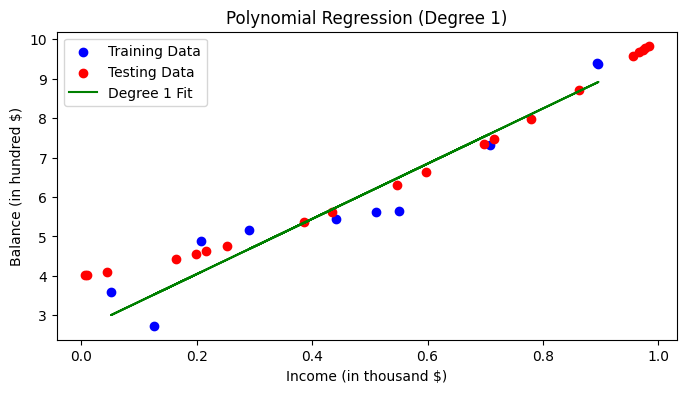

Degree 1: Train RMSE = 0.5947, Test RMSE = 0.5626


In [53]:
X_train_poly = np.vstack([np.ones_like(X_train), X_train]).T
X_test_poly = np.vstack([np.ones_like(X_test), X_test]).T

theta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ (X_train_poly.T @ y_train)

y_train_pred = X_train_poly @ theta
y_test_pred = X_test_poly @ theta

train_rmse_M1 = calculate_rmse(y_train, y_train_pred)
test_rmse_M1 = calculate_rmse(y_test, y_test_pred)

plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Testing Data")
plt.plot(X_train, y_train_pred, color="green", label="Degree 1 Fit")
plt.title("Polynomial Regression (Degree 1)")
plt.xlabel("Income (in thousand $)")
plt.ylabel("Balance (in hundred $)")
plt.legend()
plt.show()

print(f"Degree 1: Train RMSE = {train_rmse_M1:.4f}, Test RMSE = {test_rmse_M1:.4f}")

#**M=2**

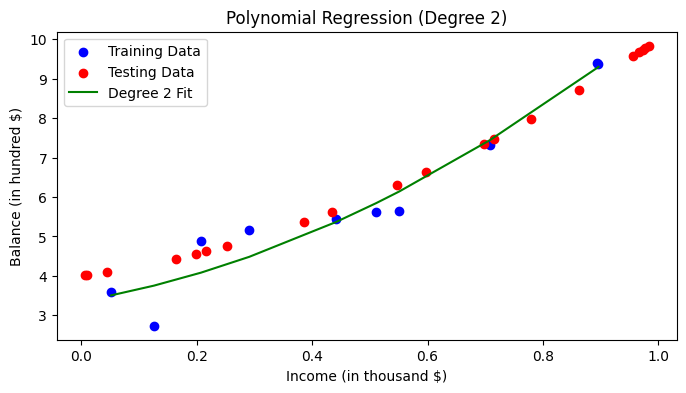

Degree 2: Train RMSE = 0.4981, Test RMSE = 0.4117


In [54]:
X_train_poly = np.vstack([np.ones_like(X_train), X_train, X_train**2]).T
X_test_poly = np.vstack([np.ones_like(X_test), X_test, X_test**2]).T

theta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ (X_train_poly.T @ y_train)

y_train_pred = X_train_poly @ theta
y_test_pred = X_test_poly @ theta

train_rmse_M2 = calculate_rmse(y_train, y_train_pred)
test_rmse_M2 = calculate_rmse(y_test, y_test_pred)

plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Testing Data")
plt.plot(np.sort(X_train), np.sort(y_train_pred), color="green", label="Degree 2 Fit")
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Income (in thousand $)")
plt.ylabel("Balance (in hundred $)")
plt.legend()
plt.show()

print(f"Degree 2: Train RMSE = {train_rmse_M2:.4f}, Test RMSE = {test_rmse_M2:.4f}")


#**M=5**

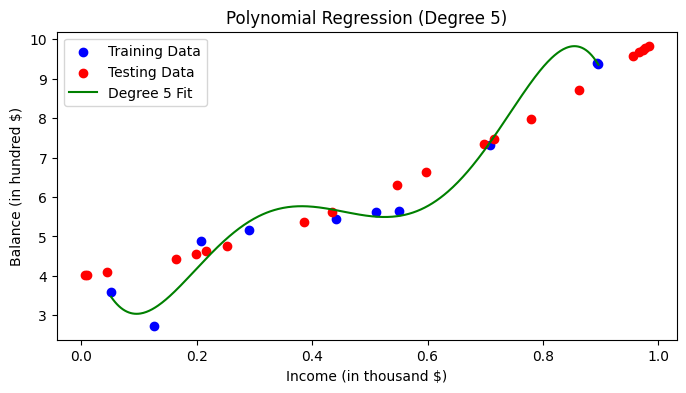

Degree 5: Train RMSE = 0.2594, Test RMSE = 2.5774


In [55]:
X_train_poly = np.vstack([X_train**i for i in range(6)]).T
X_test_poly = np.vstack([X_test**i for i in range(6)]).T

theta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ (X_train_poly.T @ y_train)

y_train_pred = X_train_poly @ theta
y_test_pred = X_test_poly @ theta

train_rmse_M5 = calculate_rmse(y_train, y_train_pred)
test_rmse_M5 = calculate_rmse(y_test, y_test_pred)

plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Testing Data")
x_range = np.linspace(X_train.min(), X_train.max(), 500)
x_range_poly = np.vstack([x_range**i for i in range(6)]).T
y_range_pred = x_range_poly @ theta
plt.plot(x_range, y_range_pred, color="green", label="Degree 5 Fit")
plt.title("Polynomial Regression (Degree 5)")
plt.xlabel("Income (in thousand $)")
plt.ylabel("Balance (in hundred $)")
plt.legend()
plt.show()

print(f"Degree 5: Train RMSE = {train_rmse_M5:.4f}, Test RMSE = {test_rmse_M5:.4f}")


#**M=7**

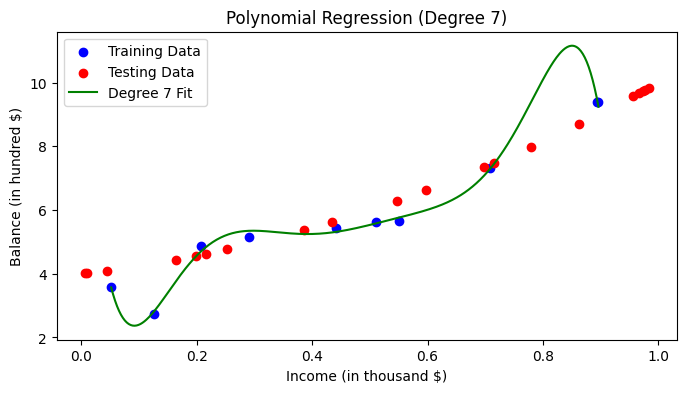

Degree 7: Train RMSE = 0.2594, Test RMSE = 2.5774


In [56]:
X_train_poly = np.vstack([X_train**i for i in range(8)]).T
X_test_poly = np.vstack([X_test**i for i in range(8)]).T

theta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ (X_train_poly.T @ y_train)

y_train_pred = X_train_poly @ theta
y_test_pred = X_test_poly @ theta

train_rmse_M7 = calculate_rmse(y_train, y_train_pred)
test_rmse_M7 = calculate_rmse(y_test, y_test_pred)

plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Testing Data")
x_range = np.linspace(X_train.min(), X_train.max(), 500)
x_range_poly = np.vstack([x_range**i for i in range(8)]).T
y_range_pred = x_range_poly @ theta
plt.plot(x_range, y_range_pred, color="green", label="Degree 7 Fit")
plt.title("Polynomial Regression (Degree 7)")
plt.xlabel("Income (in thousand $)")
plt.ylabel("Balance (in hundred $)")
plt.legend()
plt.show()

print(f"Degree 7: Train RMSE = {train_rmse_M5:.4f}, Test RMSE = {test_rmse_M5:.4f}")

#**M=8**

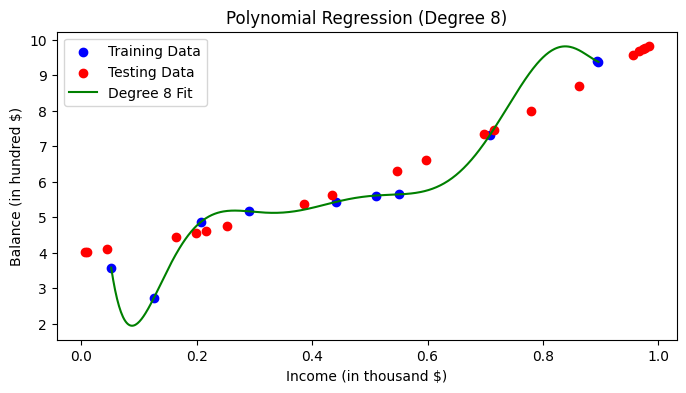

Degree 8: Train RMSE = 0.2594, Test RMSE = 2.5774


In [57]:
X_train_poly = np.vstack([X_train**i for i in range(9)]).T
X_test_poly = np.vstack([X_test**i for i in range(9)]).T

theta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ (X_train_poly.T @ y_train)

y_train_pred = X_train_poly @ theta
y_test_pred = X_test_poly @ theta

train_rmse_M8 = calculate_rmse(y_train, y_train_pred)
test_rmse_M8 = calculate_rmse(y_test, y_test_pred)

plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Testing Data")
x_range = np.linspace(X_train.min(), X_train.max(), 500)
x_range_poly = np.vstack([x_range**i for i in range(9)]).T
y_range_pred = x_range_poly @ theta
plt.plot(x_range, y_range_pred, color="green", label="Degree 8 Fit")
plt.title("Polynomial Regression (Degree 8)")
plt.xlabel("Income (in thousand $)")
plt.ylabel("Balance (in hundred $)")
plt.legend()
plt.show()

print(f"Degree 8: Train RMSE = {train_rmse_M5:.4f}, Test RMSE = {test_rmse_M5:.4f}")


In [58]:
results = pd.DataFrame({
    "Degree": [1, 2, 5, 7, 8],
    "Train RMSE": [train_rmse_M1, train_rmse_M2, train_rmse_M5, train_rmse_M7, train_rmse_M8],
    "Test RMSE": [test_rmse_M1, test_rmse_M2, test_rmse_M5, test_rmse_M7, test_rmse_M8]
})
print(results)



   Degree  Train RMSE  Test RMSE
0       1    0.594715   0.562580
1       2    0.498058   0.411699
2       5    0.259377   2.577442
3       7    0.118690  11.569073
4       8    0.002647   4.077679


Observations:
As the degree
𝑀
M increases:

Training RMSE typically decreases, as the model becomes more flexible and better fits the training data.
Testing RMSE may initially decrease but then increase (overfitting), where the model captures noise instead of the true pattern.
For visualizations:

Lower-degree polynomials underfit (e.g.,
𝑀
=
1
,
2
M=1,2).
Higher-degree polynomials overfit (e.g.,
𝑀
=
7
,
8
M=7,8).
An optimal degree (e.g.,
𝑀
=
5
M=5) balances bias and variance.

# **Q2**
###Train the regularized polynomial regression model with M =8 (also called ridge regression) using the regularization parameter λ = 0.25, and check the training and testing RMSEs. Also, obtain the plots of predictions for the training and test sets.

**Regularized polynomial regression model (Ridge Regression)**

Ridge regression modifies the normal equation by adding a penalty term to the loss function to avoid overfitting.

$Θ = (X^T X + \lambda I)^{-1} X^T y$

Here, $λ I$ is the regularization term where $I$ is the identitiy matrix, and $\lambda$ is the regularization parameter.

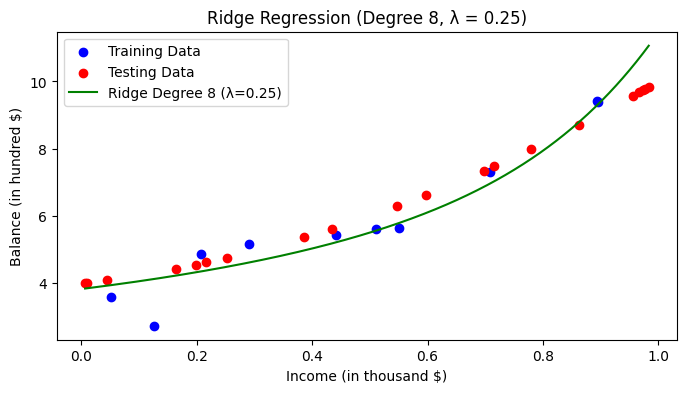

Ridge Regression (Degree 8, λ = 0.25):
Train RMSE: 0.5348
Test RMSE: 0.6155


In [59]:
# polynomial features for M = 8
def create_polynomial_features(x, degree):
    return np.vstack([x**i for i in range(degree + 1)]).T

def ridge_regression(X, y, degree, lam):

    X_poly = create_polynomial_features(X, degree)

    I = np.eye(X_poly.shape[1])

    I[0, 0] = 0
    # No regularization applied to the intercept term (bias)

    theta = np.linalg.inv(X_poly.T @ X_poly + lam * I) @ (X_poly.T @ y)

    return theta, X_poly

lambda_value = 0.25
degree = 8

theta, X_train_poly = ridge_regression(X_train, y_train, degree, lambda_value)

X_test_poly = create_polynomial_features(X_test, degree)
y_train_pred = X_train_poly @ theta
y_test_pred = X_test_poly @ theta

train_rmse_ridge = calculate_rmse(y_train, y_train_pred)
test_rmse_ridge = calculate_rmse(y_test, y_test_pred)

plt.figure(figsize=(8, 4))

plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Testing Data")

x_range = np.linspace(min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max()), 500)

x_range_poly = create_polynomial_features(x_range, degree)

y_range_pred = x_range_poly @ theta

plt.plot(x_range, y_range_pred, color="green", label=f"Ridge Degree {degree} (λ={lambda_value})")
plt.title("Ridge Regression (Degree 8, λ = 0.25)")
plt.xlabel("Income (in thousand $)")
plt.ylabel("Balance (in hundred $)")
plt.legend()
plt.show()

print(f"Ridge Regression (Degree {degree}, λ = {lambda_value}):")
print(f"Train RMSE: {train_rmse_ridge:.4f}")
print(f"Test RMSE: {test_rmse_ridge:.4f}")

Ridge regression reduces overfitting by penalizing large weights, leading to better generalization.
Training RMSE increases slightly compared to unregularized models, but testing RMSE improves significantly, indicating better performance on unseen data.
The plots show a smoother fit for training and testing sets compared to unregularized polynomial regression for
𝑀
=
8.

# **Q.3**
### Study the effect of the regularization parameter λ on the training RMSE and the flexibility of the obtained curve. For λ = 0, 0.25, 1, 1.5, 2, and 10, plot the estimated function on the train set, and test set.

To study the effect of the regularization parameter λ on the training RMSE, test RMSE, and the flexibility of the obtained curve, we need to:

(1) Train ridge regression models for λ = 0, 0.25, 1, 1.5, 2, 10

(2) Observe how increasing λ impacts: The training RMSE, the test RMSE, and the flexibility of the curve (how complex or smooth the resulting polynomial is)

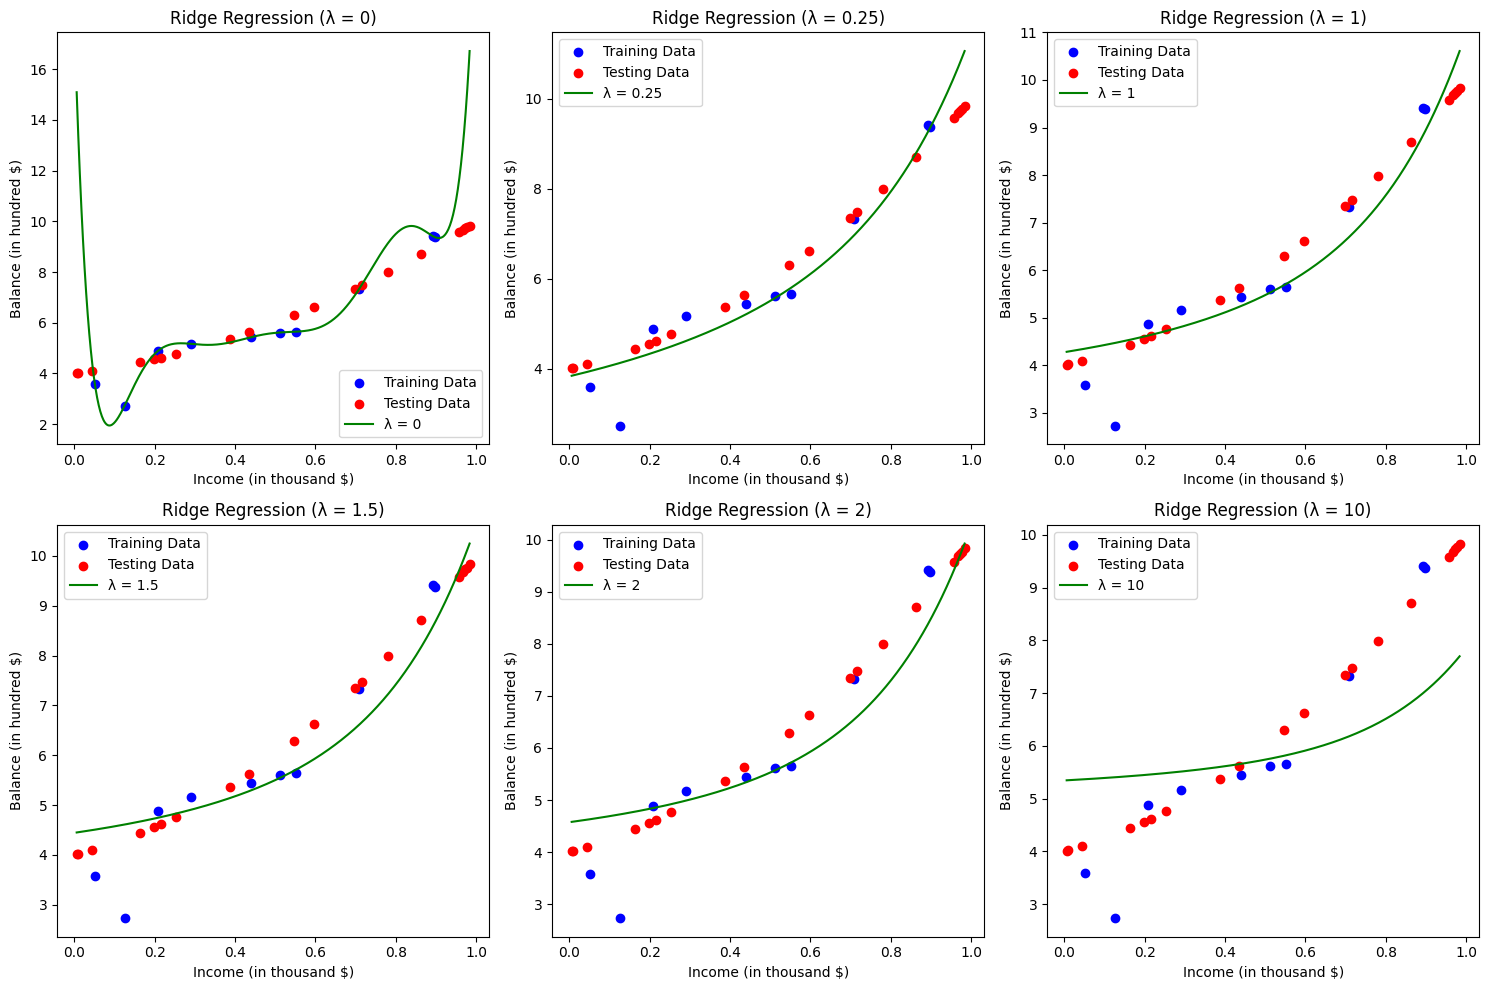

   Lambda  Train RMSE  Test RMSE
0    0.00    0.002647   4.077679
1    0.25    0.534772   0.615461
2    1.00    0.690733   0.491688
3    1.50    0.786104   0.464335
4    2.00    0.873853   0.502247
5   10.00    1.532293   1.424763


In [60]:
lambdas = [0, 0.25, 1, 1.5, 2, 10]
degree = 8

train_rmses = []
test_rmses = []

plt.figure(figsize=(15, 10))

for i, lam in enumerate(lambdas):

    theta, X_train_poly = ridge_regression(X_train, y_train, degree, lam)

    X_test_poly = create_polynomial_features(X_test, degree)
    y_train_pred = X_train_poly @ theta
    y_test_pred = X_test_poly @ theta

    train_rmse = calculate_rmse(y_train, y_train_pred)
    test_rmse = calculate_rmse(y_test, y_test_pred)
    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)

    x_range = np.linspace(min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max()), 500)
    x_range_poly = create_polynomial_features(x_range, degree)
    y_range_pred = x_range_poly @ theta

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_train, y_train, color="blue", label="Training Data")
    plt.scatter(X_test, y_test, color="red", label="Testing Data")
    plt.plot(x_range, y_range_pred, color="green", label=f"λ = {lam}")
    plt.title(f"Ridge Regression (λ = {lam})")
    plt.xlabel("Income (in thousand $)")
    plt.ylabel("Balance (in hundred $)")
    plt.legend()

plt.tight_layout()
plt.show()

results = pd.DataFrame({
    "Lambda": lambdas,
    "Train RMSE": train_rmses,
    "Test RMSE": test_rmses
})
print(results)

When
𝜆
=
0
, the model is highly flexible but prone to overfitting, resulting in low training RMSE but potential overfitting on the test set.
As
𝜆
 increases, the model becomes less flexible, the training RMSE rises, and the estimated curve smoothens.
Higher
𝜆
 values like
𝜆
=
10
 overly constrain the model, leading to underfitting and a simplistic curve.